# NGC Kreek OAall GWAS
__Author__: Jesse Marks

This document logs the steps taken to perform an opioid addiction GWAS on [Kreek](https://www.ncbi.nlm.nih.gov/projects/gap/cgi-bin/dataset.cgi?study_id=phs001109.v1.p1&phv=261899&phd=6837&pha=&pht=5447&phvf=&phdf=&phaf=&phtf=&dssp=1&consent=&temp=1) subjects versus all controls of [](). The processing performed on these data follow the Heroin NIDA Genetics Consortium (NGC) Protocol. For any general or specific questions regarding this protocol, speak with Eric O. Johnson.

## Software and tools
The software and tools used for processing these data are

* [Amazon Elastic Compute Cloud(EC2)](https://aws.amazon.com/ec2/)
* GNU bash version 4.1.2
* [PLINK v1.9 beta 3.45](https://www.cog-genomics.org/plink/)
* [EIGENSOFT v4.2](https://www.hsph.harvard.edu/alkes-price/software/)
* [R v3.2.3](https://www.r-project.org/)
* R packages: MASS, moments
* [RVtests](https://render.githubusercontent.com/view/ipynb?commit=3bb8e661ad8b75af027ed2748133452ec251aaed&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f525449496e7465726e6174696f6e616c2f6271756163685f6e6f7465626f6f6b732f336262386536363161643862373561663032376564323734383133333435326563323531616165642f6865726f696e5f70726f6a6563742f646576656c6f702f32303138303131305f756873325f756873335f666f755f677761732e6970796e623f746f6b656e3d41664d79344e373237626e764465456f46535a697770346b48776246577964706b7335617570495a7741253344253344&nwo=RTIInternational%2Fbquach_notebooks&path=heroin_project%2Fdevelop%2F20180110_uhs2_uhs3_fou_gwas.ipynb&repository_id=105297875&repository_type=Repository)

## Variable information
### NGC Protocol Specifications
* OAall (coded 1 for all controls, 2 for OA cases)
* Sex (coded 1 for female, 2 for male)
* Any additional covariates (coded 1 for no, 2 for yes)
* Age (years)

### Kreek
#### genotype data (n=1200)
`wc -l aa_chr_all.fam` <br>
576
`wc -l ea_chr_all.fam` <br>
624

#### phenotype data (n=1661)
Note, I will remap these to be consistent with the NGC protocol. 
[`affection_status`](https://www.ncbi.nlm.nih.gov/projects/gap/cgi-bin/variable.cgi?study_id=phs001109.v1.p1&phv=261892&phd=6837&pha=&pht=5447&phvf=1&phdf=&phaf=&phtf=&dssp=1&consent=&temp=1) <br>
* Case control status of the subject for opioid dependence
* 1 is opioid_dependence, 2 is no_opioid_dependence 
* 864 cases, 797 controls - total 1,661

[__OAall Variables__](https://www.ncbi.nlm.nih.gov/projects/gap/cgi-bin/dataset.cgi?study_id=phs001109.v1.p1&phv=261892&phd=6837&pha=&pht=5447&phvf=1&phdf=&phaf=&phtf=1&dssp=1&consent=&temp=1):
`Female (sex)` <br>
* 1 is male, 2 is female (Note, I will remap these to be consistent with the NGC protocol.)
* 1040 males, 616 females - total 1,656 (5 are missing sex data)

`Ageatint` <br>
* Age (integer) - total 1,661

**other variables**:
`opioid_dep      cocaine_dep     alcohol_dep   nicotine_dep     cannabis_dep    stimulant_dep   sedative_dep    other_dep       opioid_abuse    cocaine_abuse   alcohol_abuse   cannabis_abuse  stimulant_abuse        sedative_abuse  other_abuse`

Note, there is a discrepancy between the `affection_status` variable and the `opioid_dep` variable. 

## Update
**Resolution of Phenotype Concerns**

It turns out that there are no discrepancies between the reported phenotype information on dbGaP and what is actually in the phenotype file that was downloaded. The issue stemmed from the fact that five subjects were missing values for the age variable in the phenotype file. This caused the R software and other command line tools to read the data incorrectly. After reading the data into the Python software the issue was resolved.

Note, the five subjects with missing age data are:

* 101465
* 102648
* 106607
* 106646
* 107543

## View distribution of other phenotype variable 
See if we need to adjust for other confounding factors.

`0=no abuse/use
1=abuse/use`

There is data for:

`opioid_dep
cocaine_dep

opioid_abuse
cocaine_abuse
alcohol_abuse`

In [ ]:
getwd()

Note, there were some issues with read the data with R and command line tools. Because of this, I read the phenotype data into Python and then saved it as `kreek.phenotype.table`.

In [ ]:
## local machine ##
#scp -i ~/.ssh/gwas_rsa ec2-user@34.202.49.209:/shared/impute/kreek/data/phenotype/processing/phs001109.v1.pht005447.v1.p1.c1.Addictive_Diseases_Subject_Phenotypes.DS-ADX-IRB-NPU.txt .
#tail -n +11 phs001109.v1.pht005447.v1.p1.c1.Addictive_Diseases_Subject_Phenotypes.DS-ADX-IRB-NPU.txt > phenotypes.all.variables
setwd('C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype/')
all.variables <- read.table('kreek.phenotype.table',
                            header = TRUE, fill=T)
head(all.variables)
#affection.status.file <- read.table('phs001109.v1.pht005445.v1.p1.Addictive_Diseases_Subject.MULTI.txt',
#                                    header = TRUE, fill=T)
#head(affection.status.file)
#print("AFFECTION_STATUS")
#table(affection.status.file$AFFECTION_STATUS)
print("opioid_dep")
table(all.variables$opioid_dep)
#print("opioid_abuse")
#table(all.variables$opioid_abuse)

There are 797 controls and 864 cases. 

In [ ]:
print("opioid_dep")
table(all.variables$opioid_dep)
print("cocaine_dep")
table(all.variables$cocaine_dep)
print("alcohol_dep")
table(all.variables$alcohol_dep)
print("nicotine_dep")
table(all.variables$nicotine_dep)
print("cannabis_dep")
table(all.variables$cannabis_dep)
print("stimulant_dep")
table(all.variables$stimulant_dep)
print("sedative_dep")
table(all.variables$sedative_dep)
print("other_dep")
table(all.variables$other_dep)
print("sedative_abuse")
table(all.variables$sedative_abuse)
print("opioid_abuse")
table(all.variables$opioid_abuse)
print("cocaine_abuse")
table(all.variables$cocaine_abuse)
print("alcohol_abuse")
table(all.variables$alcohol_abuse)
print("cannabis_abuse")
table(all.variables$cannabis_abuse)
print("stimulant_abuse")
table(all.variables$stimulant_abuse)
print("other_abuse")
table(all.variables$other_abuse)
print("")
print("Note, there are 5 subjects without age data.")
table(all.variables$age)

# Prepare files for rvTest
## Phenotype Data
### Filter to variables of interest
For this first run, we will be performing a baseline GWAS.

In [ ]:
cd /shared/data/studies/kreek/phenotype

phenoDir=/shared/data/studies/kreek/phenotype
genoDir=/shared/data/studies/kreek/genotype/original
# contruct phenotype file (combine columns from phenotype files into one file)
# should have age, sex, case/control status
awk '{print $2,$3,$4,$9}' kreek.phenotype.table > kreek.phenotype.table.ID.age.sex.opioid_dep


# get IDs of subjects with genotype data
cut -d ' ' -f2 $genoDir/ea_chr_all.fam > $phenoDir/kreek.ea.genotype.IDs
cut -d ' ' -f2 $genoDir/aa_chr_all.fam > $phenoDir/kreek.aa.genotype.IDs

# filter phenotype data based on genotype ids (subjects with geno data)
# note that there were ancestral reasignments made during the genotype QC,
head -n1 kreek.phenotype.table.ID.age.sex.opioid_dep > aa.kreek.phenotype.table.ID.age.sex.opioid_dep
head -n1 kreek.phenotype.table.ID.age.sex.opioid_dep > ea.kreek.phenotype.table.ID.age.sex.opioid_dep

awk 'NR==FNR{a[$1];next} FNR==1{print $0;next} FNR>=2{ if($1 in a) {print $0}}' \
    kreek.ea.genotype.IDs kreek.phenotype.table.ID.age.sex.opioid_dep >\
    ea.kreek.phenotype.table.ID.age.sex.opioid_dep

awk 'NR==FNR{a[$1];next} FNR==1{print $0;next} FNR>=2{ if($1 in a) {print $0}}' \
    kreek.aa.genotype.IDs kreek.phenotype.table.ID.age.sex.opioid_dep >\
    aa.kreek.phenotype.table.ID.age.sex.opioid_dep

# filter by missing age.sex.case/control data

wc -l *dep
```  
  577 aa.kreek.phenotype.table.ID.age.sex.opioid_dep
  625 ea.kreek.phenotype.table.ID.age.sex.opioid_dep
```

Note, this removed the subjects with missing age data. Performing the `table` function in R for every variable in the files:

```
ea.kreek.phenotype.table.ID.age.sex.opioid_dep
aa.kreek.phenotype.table.ID.age.sex.opioid_dep
```

shows that there are no missing data now. 

### map case/control and sex
The NGC protocol requires:
* 1=female & 2=male
* 1=control & 2=case

In out data we have:

* 1=male & 2=female
* 0=control and 1=case

Therefore, we need to map these data appropriately.

In [ ]:
### EC2 console ###
mkdir -p /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall

phenoDir=/shared/data/studies/kreek/phenotype
genoDir=/shared/data/studies/kreek/genotype/original
# filter the fam files based on the subjects that are in the phenotype data
# this is needed to create the PLINK filtered datasets to run eigenstrat
# It could be the case that a subject had genotype data and phenotype data but the
# phenotype data was incomplete and therefore would not be used in the final anlyses
# which is why is it necessary to create a filtered fam file (genotype data).
# For this case, the filterd.fam step is not necessary.
#grep -f id_list.txt ../genotype/original/final/ea_chr_all.fam > filtered.fam
#awk '{print $1,$2 }' filtered.fam > ea_subject_ids.keep

head aa.kreek.phenotype.table.ID.age.sex.opioid_dep
"""
SUBJECT_ID age sex opioid_dep
100002 34.0 1 0
100008 50.0 1 1
100027 52.0 1 1
100063 44.0 2 1
100070 52.0 2 0
100073 37.0 2 0
100085 36.0 2 1
100087 26.0 1 0
100101 34.0 1 0
"""

head ea.kreek.phenotype.table.ID.age.sex.opioid_dep
"""
SUBJECT_ID age sex opioid_dep
100004 56.0 1 1
100006 22.0 1 1
100007 22.0 2 1
100025 46.0 2 1
100032 45.0 2 0
100033 45.0 2 1
100047 46.0 1 1
100112 36.0 2 1
100149 36.0 2 0
"""

# map sex code and affection_status
## AA
awk  'NR>=2{ if ( $3 == "1" ) {$3=2} else {$3=1}} {print $0}' 
    aa.kreek.phenotype.table.ID.age.sex.opioid_dep >\
    aa.kreek.phenotype.table.ID.age.sex.opioid_dep.sex.mapped
awk 'NR>=2{ if ( $4 == "0" ) {$4=1} else {$4=2}} {print $0}' \
    aa.kreek.phenotype.table.ID.age.sex.opioid_dep.sex.mapped > \
    aa.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped


## EA
awk  'NR>=2{ if ( $3 == "1" ) {$3=2} else {$3=1}} {print $0}' \
    ea.kreek.phenotype.table.ID.age.sex.opioid_dep >\
    ea.kreek.phenotype.table.ID.age.sex.opioid_dep.sex.mapped
awk 'NR>=2{ if ( $4 == "0" ) {$4=1} else {$4=2}} {print $0}' \
    ea.kreek.phenotype.table.ID.age.sex.opioid_dep.sex.mapped > \
    ea.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped

In [ ]:
## local command line ##

scp -i ~/.ssh/gwas_rsa ec2-user@35.168.108.18:/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/data/phenotype/processing/* \
    /cygdrive/c/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype

In [ ]:
### R console ###
library(MASS)
options(repr.plot.width=10, repr.plot.height=17)
# note that I copied over the phenotype data to my local machine to produce the plots
setwd('C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype')

ea.data <- read.table("ea.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped", 
                                     header = T, colClasses =  rep("double",  4))
aa.data <- read.table("aa.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped", 
                                     header = T, colClasses =  rep("double",  4))

print("EA:1 is female 2 is male.")
table(ea.data$sex)
print("EA: age")
table(ea.data$age)
print("EA: Case/control - 1 is control & 2 is case")
table(ea.data$opioid_dep)
print("AA:1 is female 2 is male.")
table(aa.data$sex)
print("AA: Age")
table(aa.data$age)
print("AA:Case/control - 1 is control & 2 is case")
table(aa.data$opioid_dep)

### PCA (EIGENSTRAT)
To obtain principal component covariates to use in the GWAS statistical model, EIGENSTRAT is run on LD-pruned observed genotypes for each ancestry group. Usually a GRCh37 plus strand check is implemented, as well as a monomorphic SNP filter and discordant allele flip. Since this was already done for data in preparation for haplotype phasing, the haplotype phasing input PLINK files will be used. 

**Note**: In addition to these aforementioned data processing steps, ambiguous SNPs identified by reference panel frequency differences in the discordant allele checks were also removed prior to phasing.

#### Remove high-LD region variants

In [ ]:
### EC2 console ###
mkdir mkdir /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

genoDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/data/genotype/original
phenoDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/data/phenotype/processing
baseDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

for ancestry in {ea,aa};do
    # Generate list of variants in known high-LD regions
    perl -lane 'if (($F[0]==5 && $F[3] >= 43964243 && $F[3] <= 51464243) || ($F[0]==6 && $F[3] >= 24892021 && $F[3] <= 33392022) || ($F[0]==8 && $F[3] >= 7962590 && $F[3] <= 11962591) || ($F[0]==11 && $F[3] >= 45043424 && $F[3] <= 57243424)) { print $F[1]."\n"; }'\
    $genoDir/${ancestry}_chr_all.bim > $baseDir/${ancestry}.high_ld_regions.remove
done
            

# Remove SNPs in known high-LD regions
for ancestry in {ea,aa};do
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --bfile $genoDir/${ancestry}_chr_all \
        --exclude $baseDir/${ancestry}.high_ld_regions.remove \
        --make-bed \
        --out $baseDir/${ancestry}_high_ld_regions_removed
done

#### Linkage disequilibrium pruning
Linkage disequilibrium (LD) pruning eliminates a large degree of redundancy in the data and reduces the influence of chromosomal artifacts. The objective of LD pruning is to select a subset of variants based off of LD such that the variants in the subset are indepdendent. This filtering will not carry forward to the final processed results, but this step improves the quality of EIGENSTRAT calculations. Consequently, the LD pruned data will be used as input for those calculations.

LD pruning is implemented using [PLINK --indep-pairwise](https://www.cog-genomics.org/plink/1.9/ld#indep).

In [ ]:
### EC2 console ###
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

study=kreek
baseDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

for ancestry in {ea,aa};do
    for chr in {1..22}; do
        /shared/bioinformatics/software/scripts/qsub_job.sh \
            --job_name $study.${ancestry}.chr${chr}.ld_prune \
            --script_prefix $baseDir/${ancestry}_chr${chr}_ld_prune \
            --mem 3 \
            --nslots 2 \
            --program /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
                --noweb \
                --memory 3000 \
                --bfile $baseDir/${ancestry}_high_ld_regions_removed \
                --indep-pairwise 1500 150 0.2 \
                --chr ${chr} \
                --out $baseDir/${ancestry}_chr${chr}_ld_pruned
    done
done

# Merge *prune.in files
for ancestry in {aa,ea};do
    cat ${ancestry}_chr*_ld_pruned.prune.in > ${ancestry}_chr_all_ld_pruned.prune.in
done


# Create new PLINK filesets with only lD pruned variants
for ancestry in {aa,ea};do
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --bfile ${ancestry}_high_ld_regions_removed \
        --extract ${ancestry}_chr_all_ld_pruned.prune.in \
        --make-bed \
        --out ${ancestry}_ld_pruned
done

# Clean up
for ancestry in {aa,ea};do
    rm *${ancestry}*ld_pruned.{prune.in,prune.out,log}
    rm *${ancestry}*ld_prune*qsub*
    rm *${ancestry}*high_ld_regions*
    rm *${ancestry}*chr23_ld_pruned.hh
done

#### Rename BIM/FAM file IDs
BIM file IDs have the potential issue of being too long if encoded using the 1000 Genomes Phase 3 IMPUTE2 format. This will cause smartpca to throw an error. To resolve this the IDs are replaced by numeric values. FAM file IDs are treated similarly.

In [ ]:
### EC2 console ###
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

study=kreek

# Count ID lengths greater than 39 characters
# an example of an rsID that is too long is the following:
# rs141233280:245974067:GAAAGACGCACTTTTC:G
for ancestry in {aa,ea};do
    awk '{ if(length($1)+length($2)>39){print $2} }' ${ancestry}_ld_pruned.fam | wc -l
    awk '{ if(length($2)>39){print $2} }' ${ancestry}_ld_pruned.bim | wc -l
done
# output is
"""
0
2
0
1
"""


# Rename BIM file IDs
for ancestry in {aa,ea};do
    awk '{$2="ID_"NR; print $0}' ${ancestry}_ld_pruned.bim \
        > ${ancestry}_ld_pruned_id_renamed.bim
done

## Rename FAM file IDs
#awk '{$1="ID_"NR; print $0}' ${ancestry}_ld_pruned.fam > ${ancestry}_ld_pruned_id_renamed.fam
#done

**Note** we did not have to rename the FAM files for this case.

#### Assign Cases and Controls
Modify the fam file to include case/control status. According to PLINK,

`Phenotype value ('1' = control, '2' = case, '-9'/'0'/non-numeric = missing data if case/control)`

The NGC protocol is consistent with this assignment.

**Note**: I can probably do this in the section right before eigenstrat software is actually run.

In [ ]:
# EC2 command line #
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

baseDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat
phenoDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/data/phenotype/processing

tail -n +2 $phenoDir/aa.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped |\
    awk '{ if ($4==1) {print $1}}' > $phenoDir/aa.controls.ids

tail -n +2 $phenoDir/ea.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped |\
    awk '{ if ($4==1) {print $1}}' > $phenoDir/ea.controls.ids

# Modify FAM file to include case/control status
awk 'NR==FNR{map[$1]; next} {if($2 in map) {$6=1} else {$6=2}} {print $0} ' \
    $phenoDir/ea.controls.ids $baseDir/ea_ld_pruned.fam > $baseDir/ea_ld_pruned.case+control.mapped.fam

awk 'NR==FNR{map[$1]; next} {if($2 in map) {$6=1} else {$6=2}} {print $0} ' \
    $phenoDir/aa.controls.ids $baseDir/aa_ld_pruned.fam > $baseDir/aa_ld_pruned.case+control.mapped.fam

#### Run EIGENSTRAT
__NOTE__: For `smartpca` to run, the BIM and FAM file IDs need to be less than 39 characters in length. Often this is not a problem, but with a BIM file that has IDs renamed to the 1000 Genomes Phase 3 format, the IDs for indels can exceed the character limit. Also, the EIGENSOFT `bin` directory should be part of the PATH variable.

The `smartpca.pl` program documentation is shown below:

DOCUMENTATION of `smartpca.pl` program:

This program calls the smartpca program (see ../POPGEN/README). 
For this to work, the bin directory containing smartpca MUST be in your path. 
See `./example.perl` for a toy example.
```
../bin/smartpca.pl 
-i example.geno  : genotype file in any format (see ../CONVERTF/README)
-a example.snp   : snp file in any format (see ../CONVERTF/README)
-b example.ind   : indiv file in any format (see ../CONVERTF/README)
-k k             : (Default is 10) number of principal components to output
-o example.pca   : output file of principal components.  Individuals removed
                   as outliers will have all values set to 0.0 in this file.
-p example.plot  : prefix of output plot files of top 2 principal components.
                   (labeling individuals according to labels in indiv file)
-e example.eval  : output file of all eigenvalues
-l example.log   : output logfile
-m maxiter       : (Default is 5) maximum number of outlier removal iterations.
                   To turn off outlier removal, set -m 0.
-t topk          : (Default is 10) number of principal components along which 
                   to remove outliers during each outlier removal iteration.
-s sigma         : (Default is 6.0) number of standard deviations which an
                   individual must exceed, along one of topk top principal
           components, in order to be removed as an outlier.

OPTIONAL FLAGS:
-w poplist       : compute eigenvectors using populations in poplist only,
                   where poplist is an ASCII file with one population per line
-y plotlist      : output plot will include populations in plotlist only, 
                   where plotlist is an ASCII file with one population per line
-z badsnpname    : list of SNPs which should be excluded from the analysis
-q YES/NO        : If set to YES, assume that there is a single population and
                   the population field contains real-valued phenotypes.
           (Corresponds to qtmode parameter in smartpca program.)
           The default value for this parameter is NO.

Estimated running time of the smartpca program is 
  2.5e-12 * nSNP * NSAMPLES^2 hours            if not removing outliers.
  2.5e-12 * nSNP * NSAMPLES^2 hours * (1+m)    if m outlier removal iterations.
Thus, under the default of up to 5 outlier removal iterations, running time is 
  up to 1.5e-11 * nSNP * NSAMPLES^2 hours.```

In [ ]:
### EC2 console ###
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat
mkdir results

study=kreek
baseDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat

# Run smartpca
for ancestry in {ea,aa}; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name $study.${ancestry}_smartpca \
        --script_prefix $baseDir/smartpca.$study.${ancestry} \
        --mem 7.5 \
        --nslots 1 \
        --priority 0 \
        --program /shared/bioinformatics/software/third_party/EIG-6.1.4/bin/smartpca.perl \
            -i $baseDir/${ancestry}_ld_pruned.bed \
            -a $baseDir/${ancestry}_ld_pruned_id_renamed.bim \
            -b $baseDir/${ancestry}_ld_pruned.case+control.mapped.fam \
            -o $baseDir/results/${ancestry}_ld_pruned.pca \
            -p $baseDir/results/${ancestry}_ld_pruned.plot \
            -e $baseDir/results/${ancestry}_ld_pruned.eval \
            -l $baseDir/results/${ancestry}_ld_pruned.pca.log \
            -m 0
done

#### View PCs from EIGENSTRAT

In [ ]:
### local machine ###
# Copy results over to local machine so we can visualize the results
cd /cygdrive/c/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/eigenstrat
scp -i ~/.ssh/gwas_rsa ec2-user@35.168.108.18:/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/eigenstrat/results/*pca.evec .

In [ ]:
### R console ###
# Load PCA data
setwd("C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/eigenstrat/")
options(stringsAsFactors = F)
ea.evec <- read.table("ea_ld_pruned.pca.evec", comment.char="#", sep="", row.names=1)
#ea.evec[,1:5]
aa.evec <- read.table("aa_ld_pruned.pca.evec", comment.char="#", sep="", row.names=1)
aa.evec[,6:11]

##### EA

In [ ]:
### R console ###
# Function for plotting off-diagonal scatterplots
plot.offdiag <- function(x, y, colors=label.colors){
    #Make x and y axes equal
    limits <- c(min(x,y), max(x,y)) * 1.3
    par(usr = c(limits, limits))
    points(x,y, col=colors, pch=16)
}

# Function for plotting diagonal density plots
plot.diag <- function(x, colors=label.colors){
    d <- density(x, bw=0.01, kernel="gaussian")
    #Update plot axes limits
    par(usr = c(range(d$x), range(d$y)*1.3))
    points(d$x,d$y, type="l")
    #Add PC values
    points(x=x, y=jitter(rep(mean(d$y),times=d$n),factor=5), col=label.colors, pch=16)
}

#Run PCA and get % variance
ea.dspace <- ea.evec[1:10] #transformed dataspace

#Color label samples
sample.names <- ea.evec[,11]
label.colors <- rep(NA, length(sample.names))
label.colors[grepl(x=sample.names, pattern="Case", ignore.case=T)] <- rgb(0,80,190,80, maxColorValue=255) #blue
label.colors[grepl(x=sample.names, pattern="Control", ignore.case=T)] <- rgb(200,0,0,80, maxColorValue=255) #red
legend.cols <- c(rgb(0,80,190,255, maxColorValue=255), rgb(255,0,0,255, maxColorValue=255))

###label.colors <- rgb(0,80,190,80, maxColorValue=255) #blue

options(repr.plot.width=8, repr.plot.height=8)
#Redefine outer margin
par(oma = c(4, 1, 2, 1))
par(oma = c(4, 1, 2, 1))
pairs(x=ea.dspace[,1:5], panel=plot.offdiag, diag.panel=plot.diag, 
      labels=paste0("PC",1:5), label.pos=0.9, cex.labels=1.8)
par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="Kreek EA", cex.main=1)

par(oma = c(4, 1, 2, 1))
pairs(x=ea.dspace[,6:10], panel=plot.offdiag, diag.panel=plot.diag, 
      labels=paste0("PC",6:10), label.pos=0.9, cex.labels=1.8)
par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="Kreek EA", cex.main=1)
legend("bottom", c("Cases", "Controls"), 
       pch=19, col=legend.cols,
       xpd=TRUE, horiz=TRUE, inset=c(0,-0.02), 
       bty="n", cex=1)


#--------------------------------------------------------------------------------


##### AA

In [ ]:
### R console ###
# Function for plotting off-diagonal scatterplots
plot.offdiag <- function(x, y, colors=label.colors){
    #Make x and y axes equal
    limits <- c(min(x,y), max(x,y)) * 1.3
    par(usr = c(limits, limits))
    points(x,y, col=colors, pch=16)
}

# Function for plotting diagonal density plots
plot.diag <- function(x, colors=label.colors){
    d <- density(x, bw=0.01, kernel="gaussian")
    #Update plot axes limits
    par(usr = c(range(d$x), range(d$y)*1.3))
    points(d$x,d$y, type="l")
    #Add PC values
    points(x=x, y=jitter(rep(mean(d$y),times=d$n),factor=5), col=label.colors, pch=16)
}

#Run PCA and get % variance
aa.dspace <- aa.evec[1:10] #transformed dataspace

#Color label samples
sample.names <- aa.evec[,11]
label.colors <- rep(NA, length(sample.names))
label.colors[grepl(x=sample.names, pattern="Case", ignore.case=T)] <- rgb(0,80,190,80, maxColorValue=255) #blue
label.colors[grepl(x=sample.names, pattern="Control", ignore.case=T)] <- rgb(200,0,0,80, maxColorValue=255) #red
legend.cols <- c(rgb(0,80,190,255, maxColorValue=255), rgb(255,0,0,255, maxColorValue=255))

###label.colors <- rgb(0,80,190,80, maxColorValue=255) #blue

options(repr.plot.width=8, repr.plot.height=8)
#Redefine outer margin
par(oma = c(4, 1, 2, 1))
par(oma = c(4, 1, 2, 1))
pairs(x=aa.dspace[,1:5], panel=plot.offdiag, diag.panel=plot.diag, 
      labels=paste0("PC",1:5), label.pos=0.9, cex.labels=1.8)
par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="Kreek AA", cex.main=1)

par(oma = c(4, 1, 2, 1))
pairs(x=aa.dspace[,6:10], panel=plot.offdiag, diag.panel=plot.diag, 
      labels=paste0("PC",6:10), label.pos=0.9, cex.labels=1.8)
par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="Kreek AA", cex.main=1)
legend("bottom", c("Cases", "Controls"), 
       pch=19, col=legend.cols,
       xpd=TRUE, horiz=TRUE, inset=c(0,-0.02), 
       bty="n", cex=1)


#--------------------------------------------------------------------------------


#### Extract Eigenvectors

In [ ]:
### EC2 console ###
cd /shared/s3/ngc_vidus_oaall/eigenstrat/results

# Grab top 10 eigenvectors from PCA 
for ancestry in {ea,aa};do
    echo "FID IID EV1 EV2 EV3 EV4 EV5 EV6 EV7 EV8 EV9 EV10" > ${ancestry}_ld_pruned_top10_eigenvecs.txt
    tail -n +2 ${ancestry}_ld_pruned.pca.evec | \
        perl -lne 's/:/ /; @F=split; print join(" ",$F[0],$F[1],$F[2],$F[3],$F[4],$F[5],$F[6],$F[7],$F[8],$F[9],$F[10],$F[11]);' \
        >> ${ancestry}_ld_pruned_top10_eigenvecs.txt
done

### EA PC Selection
Determine which PCs (eigenvectors) contribute the most influence and include them in the GWAS as covariates. Include the PCs which contribute to at least %75 of the variance.
Make PED format phenotype and covariate file according to the NGC protocol.

#### Create PED files
The covariates we want to include in this baseline GWAS are age, sex, and some of the most influential PCs. Here we create the `phen` and `cov` PED files so that downstream processing will be easier. Specifically, creating the PED files will make it easier to select the PCs that explain  ∼75%  of the variance.

In [ ]:
### R (local) ###

## Phen file
#------------------------------------------------------------------------------------------
setwd("C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype/")
p.data <- "ea.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped"
pheno.data.ea <- read.csv(p.data, sep = " ", header = T, stringsAsFactors = F, 
                       colClasses=c("integer", "double", "integer", "integer"))

head(pheno.data.ea)
pca.data.ea <- read.csv("../eigenstrat/ea_ld_pruned_top10_eigenvecs.txt",
                     sep = " " , header=T, colClasses=c(rep("character",times=2), rep("double",times = 10)))

num.subjects.ea <- length(pca.data.ea[,1])

ped.file.ea <- data.frame(matrix(ncol = 6, nrow = num.subjects.ea))
colnames(ped.file.ea) <- c("fid", "iid", "patid", "matid", "sex",  "oaall")
ped.file.ea[,1] <- pca.data.ea[,1]
ped.file.ea[,2] <- pca.data.ea[,2]

# map loop (goal to fill in sex and oaall data on ped.file.ea from the pheno.data.ea)
for (i in 1:num.subjects.ea){
    # character string of the iid without quotations 
    key <- noquote(ped.file.ea[i,2])
    
    # match returns a vector of the positions of (first) matches of its first argument in its second. 
    my_match <- match(key, pheno.data.ea[,1])
    
    ped.file.ea[i,5] <- pheno.data.ea[my_match,3] # sex
    ped.file.ea[i,6] <- pheno.data.ea[my_match,4] # oaall
    
} # end i loop

head(ped.file.ea)
write.table(ped.file.ea[,1:6], "final/kreek_EUR_phen.ped", sep = "\t", row.names = F, quote=F)


#----------------------------------------------------------------------------------------------------
### Cov file

# 10 PCs plus all of the covariates (exclude oaall data)
col.names.ea <- c("fid", "iid", "patid", "matid", "sex", "age",
                  "PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")
num.columns.ea <- length(col.names.ea)
covar.data.ea <- data.frame(matrix(ncol = num.columns.ea, nrow = num.subjects.ea))
names(covar.data.ea) <- col.names.ea

num.covs.ea <- length(ped.file.ea) - 1
covar.data.ea[,1:num.covs.ea] <- ped.file.ea[,1:num.covs.ea]
covar.data.ea[,num.covs.ea+1] <- pheno.data.ea[,2] # age 

covar.data.ea[,(num.covs.ea+2):length(col.names.ea)] <- pca.data.ea[,3:length(pca.data.ea)]

head(covar.data.ea)
length(covar.data.ea[,1])

write.table(covar.data.ea, "final/kreek_EUR_cov.ped", quote=FALSE, row.names = FALSE, sep = "\t")

In [ ]:
### R console ###
# Load PCA data
setwd('C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype/final/')
options(stringsAsFactors=F)
ea.cov.data <- read.delim("kreek_EUR_cov.ped", header=T, sep="\t")
ea.phen.data <- read.delim("kreek_EUR_phen.ped", header=T, sep="\t")

# Combine PCs and phenotype into one data frame
phen.name <- "oaall"
pc.names <- paste0("PC", 1:10)
ea.data <- merge(x=ea.phen.data[,c("iid",phen.name)], y=ea.cov.data[, c("iid", paste0("PC",1:10))], by="iid")
head(ea.data)

#### Regression analysis
We use a regression model of the general structure:

$$\begin{align}
\text{FTND = PC1 + PC2 + ... + PC10}
\end{align}$$

In [ ]:
# Build model formula
model.str <- paste0(phen.name, " ~ ", paste(pc.names, collapse=" + "))
cat("MODEL FORMULA:\n\n", model.str, "\n")

# Get model fits
lm.fit.ea <- lm(formula=as.formula(model.str), data=ea.data)

# Get sequential (type I) sum of squares
anova.ea <- anova(lm.fit.ea)

# Calculate percent variance explained and sort
ea.pve <- cbind(anova.ea[pc.names,], 
                PVE=round(anova.ea[pc.names, "Mean Sq"]/sum(anova.ea[pc.names, "Mean Sq"])*100, digits=2))
ea.pve.sorted <- ea.pve[order(ea.pve$PVE, decreasing=T),]

# Output regression info
cat("\n\n================ EA group ================")
summary(lm.fit.ea)
ea.pve.sorted

#### Percent Variance Explained Visualization

In [ ]:
options(repr.plot.width=13, repr.plot.height=5)

# Set graphical parameters
cex.factor = 0.9
barplot.ylim.ea = c(0, max(ea.pve$PVE)*1.2)

# Visualize PVE
par(mfrow=c(1,2))
barplot(height=ea.pve$PVE, names.arg=rownames(ea.pve), beside=T, cex.names=cex.factor, 
        col="red3", border="red3", ylim=barplot.ylim.ea, 
        main="EA Percent Variance Explained", ylab="PVE")
plot(cumsum(ea.pve$PVE), type="b", main="EA PVE Cumulative Sum", ylab="PVE", 
     lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
axis(side=1, at=c(1:10), labels=rownames(ea.pve), cex.axis=cex.factor)

par(mfrow=c(1,2))
barplot(height=ea.pve.sorted$PVE, names.arg=rownames(ea.pve.sorted), beside=T, cex.names=cex.factor, 
        col="red3", border="red3", ylim=barplot.ylim.ea, main="EA Percent Variance Explained (Sorted PCs)", ylab="PVE")
plot(cumsum(ea.pve.sorted$PVE), type="b", main="EA PVE Cumulative Sum (Sorted PCs)", ylab="PVE", 
     lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
axis(side=1, at=c(1:10), labels=rownames(ea.pve.sorted), cex.axis=cex.factor)

Based on these results we will use PC1 and PC6. These PCs explain ~78% of the variance. 

### AA PC Selection
Determine which PCs (eigenvectors) contribute the most influence and include them in the GWAS as covariates. Include the PCs which contribute to at least %75 of the variance.
Make PED format phenotype and covariate file according to the NGC protocol.

#### Create PED files
The covariates we want to include in this baseline GWAS are age, sex, and some of the most influential PCs. Here we create the `phen` and `cov` PED files so that downstream processing will be easier. Specifically, creating the PED files will make it easier to select the PCs that explain  ∼75%  of the variance.

In [ ]:
### R (local) ###

## Phen file
#------------------------------------------------------------------------------------------
setwd("C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype/")
p.data <- "aa.kreek.phenotype.table.ID+age+sex+opioid_dep.sex.case_control.mapped"
pheno.data.aa <- read.csv(p.data, sep = " ", header = T, stringsAsFactors = F, 
                       colClasses=c("integer", "double", "integer", "integer"))

head(pheno.data.aa)
pca.data.aa <- read.csv("../eigenstrat/aa_ld_pruned_top10_eigenvecs.txt",
                     sep = " " , header=T, colClasses=c(rep("character",times=2), rep("double",times = 10)))

num.subjects.aa <- length(pca.data.aa[,1])

ped.file.aa <- data.frame(matrix(ncol = 6, nrow = num.subjects.aa))
colnames(ped.file.aa) <- c("fid", "iid", "patid", "matid", "sex",  "oaall")
ped.file.aa[,1] <- pca.data.aa[,1]
ped.file.aa[,2] <- pca.data.aa[,2]

# map loop (goal to fill in sex and oaall data on ped.file.aa from the pheno.data.aa)
for (i in 1:num.subjects.aa){
    # character string of the iid without quotations 
    key <- noquote(ped.file.aa[i,2])
    
    # match returns a vector of the positions of (first) matches of its first argument in its second. 
    my_match <- match(key, pheno.data.aa[,1])
    
    ped.file.aa[i,5] <- pheno.data.aa[my_match,3] # sex
    ped.file.aa[i,6] <- pheno.data.aa[my_match,4] # oaall
    
} # end i loop

head(ped.file.aa)
write.table(ped.file.aa[,1:6], "final/kreek_AFR_phen.ped", sep = "\t", row.names = F, quote=F)


#----------------------------------------------------------------------------------------------------
### Cov file

# 10 PCs plus all of the covariates (exclude oaall data)
col.names.aa <- c("fid", "iid", "patid", "matid", "sex", "age",
                  "PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")
num.columns.aa <- length(col.names.aa)
covar.data.aa <- data.frame(matrix(ncol = num.columns.aa, nrow = num.subjects.aa))
names(covar.data.aa) <- col.names.aa

num.covs.aa <- length(ped.file.aa) - 1
covar.data.aa[,1:num.covs.aa] <- ped.file.aa[,1:num.covs.aa]
covar.data.aa[,num.covs.aa+1] <- pheno.data.aa[,2] # age 

covar.data.aa[,(num.covs.aa+2):length(col.names.aa)] <- pca.data.aa[,3:length(pca.data.aa)]

head(covar.data.aa)
length(covar.data.aa[,1])

write.table(covar.data.aa, "final/kreek_AFR_cov.ped", quote=FALSE, row.names = FALSE, sep = "\t")

In [ ]:
### R console ###
# Load PCA data
setwd('C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/phenotype/final/')
options(stringsAsFactors=F)
aa.cov.data <- read.delim("kreek_AFR_cov.ped", header=T, sep="\t")
aa.phen.data <- read.delim("kreek_AFR_phen.ped", header=T, sep="\t")

# Combine PCs and phenotype into one data frame
phen.name <- "oaall"
pc.names <- paste0("PC", 1:10)
aa.data <- merge(x=aa.phen.data[,c("iid",phen.name)], y=aa.cov.data[, c("iid", paste0("PC",1:10))], by="iid")
head(aa.data)

#### Regression analysis
We use a regression model of the general structure:

$$\begin{align}
\text{FTND = PC1 + PC2 + ... + PC10}
\end{align}$$

In [ ]:
# Build model formula
model.str <- paste0(phen.name, " ~ ", paste(pc.names, collapse=" + "))
cat("MODEL FORMULA:\n\n", model.str, "\n")

# Get model fits
lm.fit.aa <- lm(formula=as.formula(model.str), data=aa.data)

# Get sequential (type I) sum of squares
anova.aa <- anova(lm.fit.aa)

# Calculate percent variance explained and sort
aa.pve <- cbind(anova.aa[pc.names,], 
                PVE=round(anova.aa[pc.names, "Mean Sq"]/sum(anova.aa[pc.names, "Mean Sq"])*100, digits=2))
aa.pve.sorted <- aa.pve[order(aa.pve$PVE, decreasing=T),]

# Output regression info
cat("\n\n================ AA group ================")
summary(lm.fit.aa)
aa.pve.sorted

#### Percent Variance Explained Visualization

In [ ]:
options(repr.plot.width=13, repr.plot.height=5)

# Set graphical parameters
cex.factor = 0.9
barplot.ylim.aa = c(0, max(aa.pve$PVE)*1.2)

# Visualize PVE
par(mfrow=c(1,2))
barplot(height=aa.pve$PVE, names.arg=rownames(aa.pve), beside=T, cex.names=cex.factor, 
        col="red3", border="red3", ylim=barplot.ylim.aa, 
        main="AA Percent Variance Explained", ylab="PVE")
plot(cumsum(aa.pve$PVE), type="b", main="AA PVE Cumulative Sum", ylab="PVE", 
     lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
axis(side=1, at=c(1:10), labels=rownames(aa.pve), cex.axis=cex.factor)

par(mfrow=c(1,2))
barplot(height=aa.pve.sorted$PVE, names.arg=rownames(aa.pve.sorted), beside=T, cex.names=cex.factor, 
        col="red3", border="red3", ylim=barplot.ylim.aa, main="AA Percent Variance Explained (Sorted PCs)", ylab="PVE")
plot(cumsum(aa.pve.sorted$PVE), type="b", main="AA PVE Cumulative Sum (Sorted PCs)", ylab="PVE", 
     lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
axis(side=1, at=c(1:10), labels=rownames(aa.pve.sorted), cex.axis=cex.factor)

Based on these results we will use PC1, PC2, and PC3. These PCs explain ~80% of the variance. 

### Alter iid to match imputed data
The IDs in the genotype (imputed data) are of the form `fid_iid`. Therefore, I need to map the iid in the PED files to this format.

In [ ]:
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/data/phenotype/final


## AA ##
awk ' BEGIN{ OFS="_"} NR>=2{ print $1,$2}' kreek_NGCW1_AFR_cov.ped > new_iid.AFR
awk ' BEGIN{ OFS="\t"} NR==FNR{ map[NR] = $1;next } FNR>=2{$2 = map[FNR-1]} {print $0 }' new_iid.AFR kreek_NGCW1_AFR_cov.ped 
awk ' BEGIN{ OFS="\t"} NR==FNR{ map[NR] = $1;next } FNR>=2{$2 = map[FNR-1]} {print $0 }' new_iid.AFR kreek_NGCW1_AFR_phen.ped 

## EA ##
awk ' BEGIN{ OFS="_"} NR>=2{ print $1,$2}' kreek_NGCW1_EUR_cov.ped > new_iid.EUR
awk ' BEGIN{ OFS="\t"} NR==FNR{ map[NR] = $1;next } FNR>=2{$2 = map[FNR-1]} {print $0 }' new_iid.EUR kreek_NGCW1_EUR_cov.ped >\
    tmp && mv tmp kreek_NGCW1_EUR_cov.ped
awk ' BEGIN{ OFS="\t"} NR==FNR{ map[NR] = $1;next } FNR>=2{$2 = map[FNR-1]} {print $0 }' new_iid.EUR kreek_NGCW1_EUR_phen.ped >\
    tmp && mv tmp kreek_NGCW1_EUR_phen.ped

## Genotype Data
Prepare Genotype Data for rvTest.
### Inflate imputation results
These data were imputed on the Michigan Imputation Server and therefore need to be inflated.

In [ ]:
# inflate EA chr results
for f in {1..23};do
echo '#!/bin/bash' > chr_$f.sh
echo '' >> chr_$f.sh
echo 'unzip -P "\aKcPO5MYw6qr" chr_'$f'.zip' >> chr_$f.sh
done

for chr in {1..22}; do
    sh /shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name ea.inflate_chr${chr} \
    --script_prefix ea.chr${chr}_inflation \
    --mem 5 \
    --priority 0 \
    --nslots 1 \
    --program bash chr_${chr}.sh
done

rm *.sh

# inflate AA chr results 
# inflate chr results
for f in {1..22};do
echo '#!/bin/bash' > chr_$f.sh
echo '' >> chr_$f.sh
echo 'unzip -P "K4niGTjlm3O(xZ" chr_'$f'.zip' >> chr_$f.sh
done

for chr in {1..22}; do
    sh /shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name aa.inflate_chr${chr} \
    --script_prefix aa.chr${chr}_inflation \
    --mem 5 \
    --priority 0 \
    --nslots 1 \
    --program bash chr_${chr}.sh
done

rm *.sh

# Start rvTest Analysis
Perform GWAS

| Ancestry | cases | controls | Total |
|----------|-------|----------|-------|
| AFR      | 206   | 370      | 576   |
| EUR      | 408   | 216      | 624   |


**Note** you can find a description of the output from [rvtest here](https://genome.sph.umich.edu/wiki/Summary_Statistics_Files_Specification_for_RAREMETAL_and_rvtests).

## AA GWAS
PC1, PC2, and PC3

In [ ]:
# Command line # 
ancestry="aa"
pop=AFR
study=kreek
covars="sex,age,PC1,PC2,PC3"

mkdir -p /shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry/{final,processing}

for chr in {1..22};do
    mkdir /shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry/processing/chr$chr
done

imputeDir=/shared/data/studies/$study/genotype/impute/$ancestry/inflated
processingDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry
phenoDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/data/phenotype/final

# Run RVtest
for chr in {1..22}; do
    sh /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name ${ancestry}_${chr}_rvtest \
        --script_prefix $processingDir/processing/chr$chr/${ancestry}_${chr}_rvtest \
        --mem 7.5 \
        --nslots 2 \
        --priority 0 \
        --program /shared/bioinformatics/software/third_party/rvtests/executable/rvtest \
            --inVcf $imputeDir/chr${chr}.dose.vcf.gz \
            --pheno $phenoDir/${study}_NGCW1_${pop}_phen.ped \
            --pheno-name oaall \
            --covar $phenoDir/${study}_NGCW1_${pop}_cov.ped \
            --covar-name $covars \
            --xLabel X \
            --meta score \
            --useResidualAsPhenotype \
            --inverseNormal \
            --qtl \
            --dosage DS \
            --out $processingDir/processing/chr$chr/$study.$pop.1000G.oaall.chr$chr
done

## EA GWAS
PC1 and PC6

In [ ]:
# Command line # 
ancestry="ea"
pop=EUR
study=kreek
covars="sex,age,PC1,PC6"

mkdir -p /shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry/{final,processing}

for chr in {1..22};do
    mkdir /shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry/processing/chr$chr
done

imputeDir=/shared/data/studies/$study/genotype/impute/$ancestry/inflated
processingDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry
phenoDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/data/phenotype/final

# Run RVtest
for chr in {1..22}; do
    sh /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name ${ancestry}_${chr}_rvtest \
        --script_prefix $processingDir/processing/chr$chr/${ancestry}_${chr}_rvtest \
        --mem 7.5 \
        --nslots 2 \
        --priority 0 \
        --program /shared/bioinformatics/software/third_party/rvtests/executable/rvtest \
            --inVcf $imputeDir/chr${chr}.dose.vcf.gz \
            --pheno $phenoDir/${study}_NGCW1_${pop}_phen.ped \
            --pheno-name oaall \
            --covar $phenoDir/${study}_NGCW1_${pop}_cov.ped \
            --covar-name $covars \
            --xLabel X \
            --meta score \
            --useResidualAsPhenotype \
            --inverseNormal \
            --qtl \
            --dosage DS \
            --out $processingDir/processing/chr$chr/$study.$ancestry.1000G.oaall.chr$chr
done

# Results Processing
## MAF > 0.01 & Rsq > 0.3

In [ ]:
### EC2 console ###
cd /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001 


# Get list of variants to filter by imputation quality and MAF
for ancestry in {ea,aa};do
    imputeDir=/shared/data/studies/$study/genotype/impute/$ancestry/inflated
    processingDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry
    phenoDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/data/phenotype/final
    for chr in {1..22}; do
        echo -e "${ancestry} chr${chr}..."
        zcat $imputeDir/chr${chr}.info.gz | \
            tail -n +2 | \
            awk '{ if($5 > 0.01 && $7 > 0.3){ print $1":"$2":"$3 } }' \
            > $processingDir/processing/chr$chr/${ancestry}_chr${chr}_variants_maf_gt_0.01_rsq_gt_0.3.keep
    done
done


# Filter results files
study=kreek
for ancestry in {ea,aa}; do
   # if [ $ancestry == ea ]; then
   #     pop=EUR
   # else
   #     pop=AFR
   # fi
    processingDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry
    for chr in {1..22}; do
        echo "processing $ancestry chr${chr}..."
        awk '{ if(NR==FNR){ map[$1]=1; next } { if(map[$1":"$2":"$3":"$4]==1){ print $0 } } }' \
            $processingDir/processing/chr$chr/${ancestry}_chr${chr}_variants_maf_gt_0.01_rsq_gt_0.3.keep \
            <(zgrep -P "^${chr}\s" $processingDir/processing/chr$chr/${study}.${ancestry}.1000G.oaall.chr${chr}.MetaScore.assoc.gz) \
            > $processingDir/processing/chr$chr/${study}.${ancestry}.1000G.oaall.chr${chr}.tmp
    done 
    cat $processingDir/processing/chr*/${study}.${ancestry}.1000G.oaall.chr*tmp | gzip -c > $processingDir/final/${study}.${ancestry}.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.gz

    # cleanup
    rm $processingDir/processing/chr*/*tmp 
done

# Make results table
for ancestry in {ea,aa}; do
    processingDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry
    outfile=$processingDir/processing/${study}.${ancestry}.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.table
    echo -e "VARIANT_ID\tCHR\tPOSITION\tP\tTYPE" > $outfile
    infile=$processingDir/final/${study}.${ancestry}.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.gz
    echo "Processing ${infile}"
    zcat ${infile} | \
        perl -lane 'if (($F[2] eq "A" || $F[2] eq "C" || $F[2] eq "G" || $F[2] eq "T") && (($F[3] eq "A" || $F[3] eq "C" || $F[3] eq "G" || $F[3] eq "T"))) {
                        print join("\t",$F[0].":".$F[1],$F[0],$F[1],$F[15],"snp");
                    } else {
                        print join("\t",$F[0].":".$F[1],$F[0],$F[1],$F[15],"indel");
                    }' >> $outfile
done

# Make Q-Q and manhattan plots
# Plot all chromosomes
study=kreek
for ancestry in {ea,aa};do
    processingDir=/shared/bioinformatics/jmarks/heroin/$study/gwas/oaall/association_tests/001/$ancestry
    sh /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name gwas_plots_${ancestry} \
        --script_prefix $processingDir/final/${ancestry}.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.plot \
        --mem 30.6 \
        --nslots 7 \
        --priority 0 \
        --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
            --in $processingDir/processing/kreek.$ancestry.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.table \
            --in_chromosomes autosomal_nonPAR \
            --in_header \
            --out $processingDir/final/kreek.${ancestry}.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.plot.all_chr \
            --col_id VARIANT_ID \
            --col_chromosome CHR \
            --col_position POSITION \
            --col_p P \
            --col_variant_type TYPE \
            --generate_snp_indel_manhattan_plot \
            --manhattan_odd_chr_color red3 \
            --manhattan_even_chr_color dodgerblue3 \
            --manhattan_points_cex 1.5 \
            --generate_snp_indel_qq_plot \
            --qq_lines \
            --qq_points_bg black \
            --qq_lambda
done

##  rs3778150 and rs1799971 search
Dana wanted to pull out the chr. 6 results for the OPRM1 SNPs rs3778150 and rs1799971. My results are of the form chr_position and not rsIDs. So, I used the website [dbSNP](https://www.ncbi.nlm.nih.gov/projects/SNP/) to look up the positions for these two snps. Note that we are using genome build 37.

CHROM   POS     REF     ALT     N_INFORMATIVE   AF      INFORMATIVE_ALT_AC      CALL_RATE       HWE_PVALUE      N_REF   N_HET   N_ALT   U_STAT  SQRT_V_STAT ALT_EFFSIZE PVALUE
STAT    ALT_EFFSIZE     PVALUE

6       154383658       T       C       576     0.217877        250.994 1       0.464436        349     203     24      -8.34041        13.7856 -0.0438868     0.545174

6       154360797       A       G       576     0.0243056       28      1       1       548     28      0       0.920231        5.1671  0.034467      0.858649


## View plots
### AA

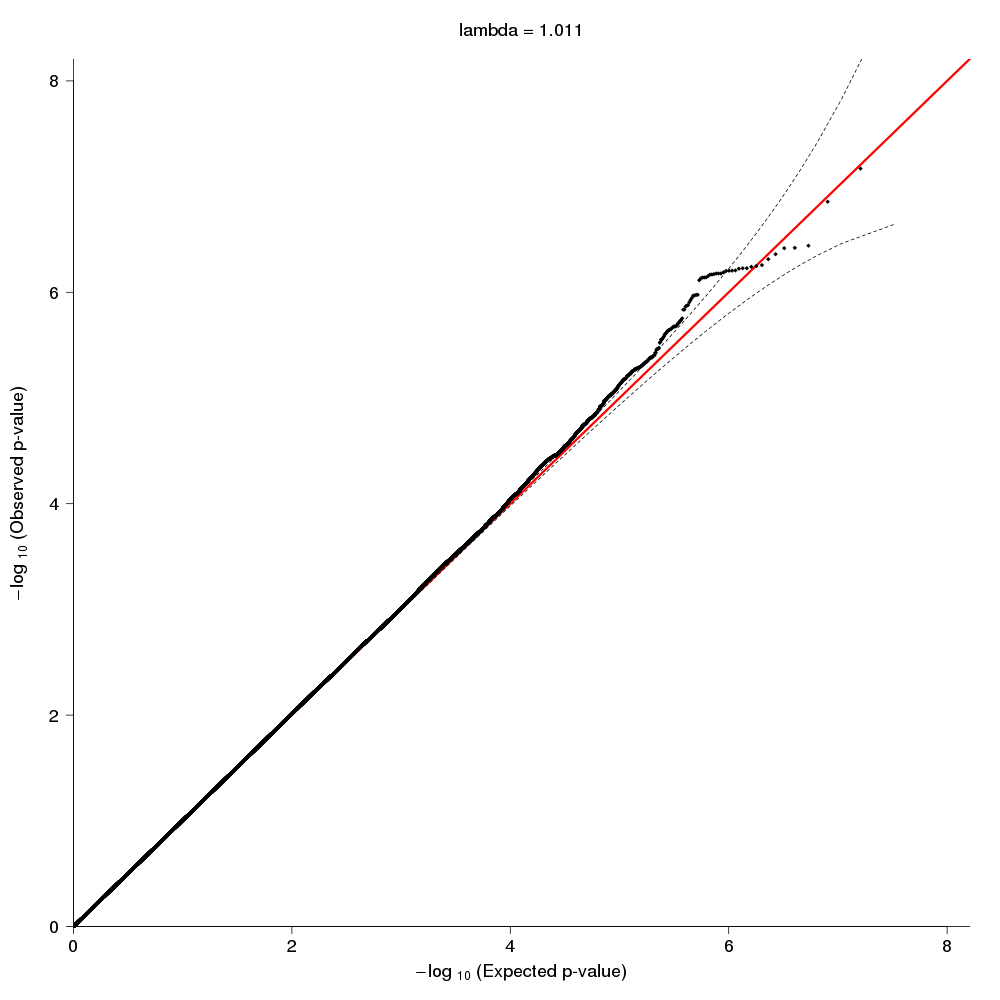

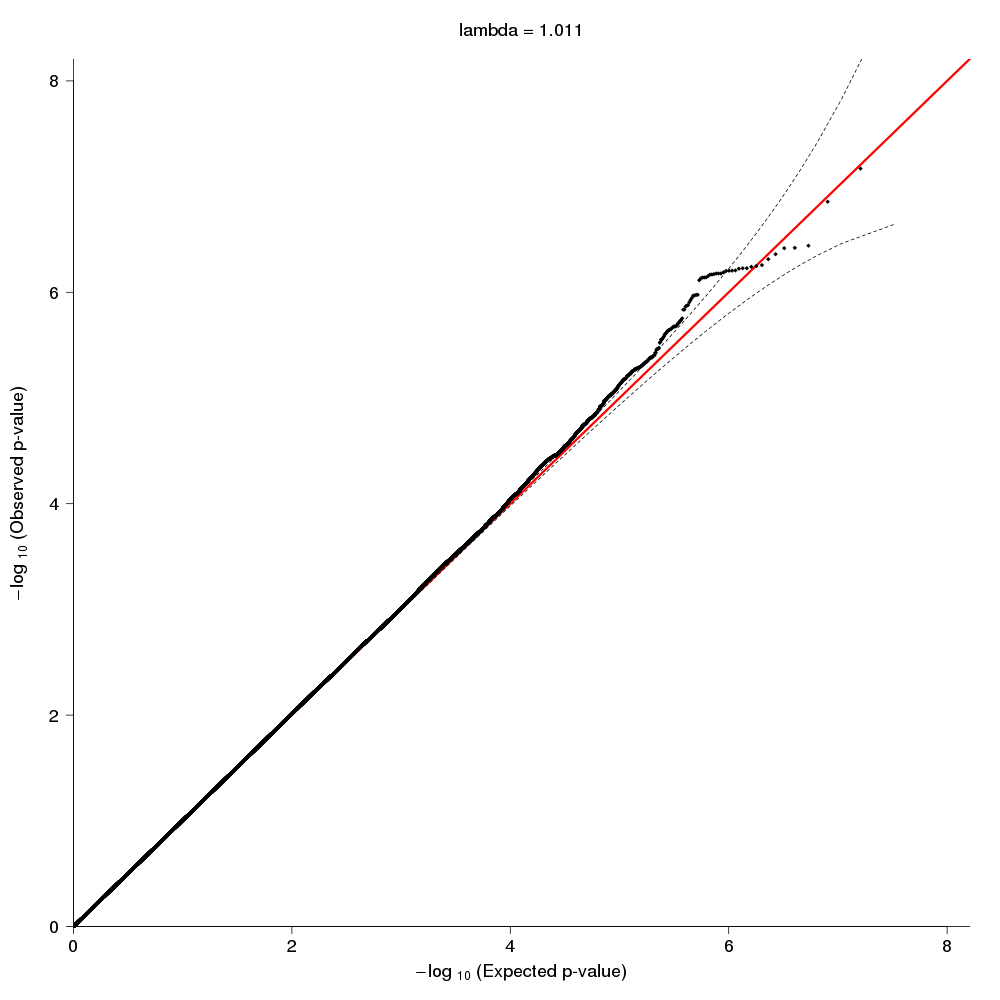

In [4]:
library("IRdisplay")
display_png(file="C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/results/aa/kreek.aa.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.plot.all_chr.snps+indels.qq.png")  
display_png(file="C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/results/aa/kreek.aa.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.plot.all_chr.snps+indels.qq.png")  

### EA

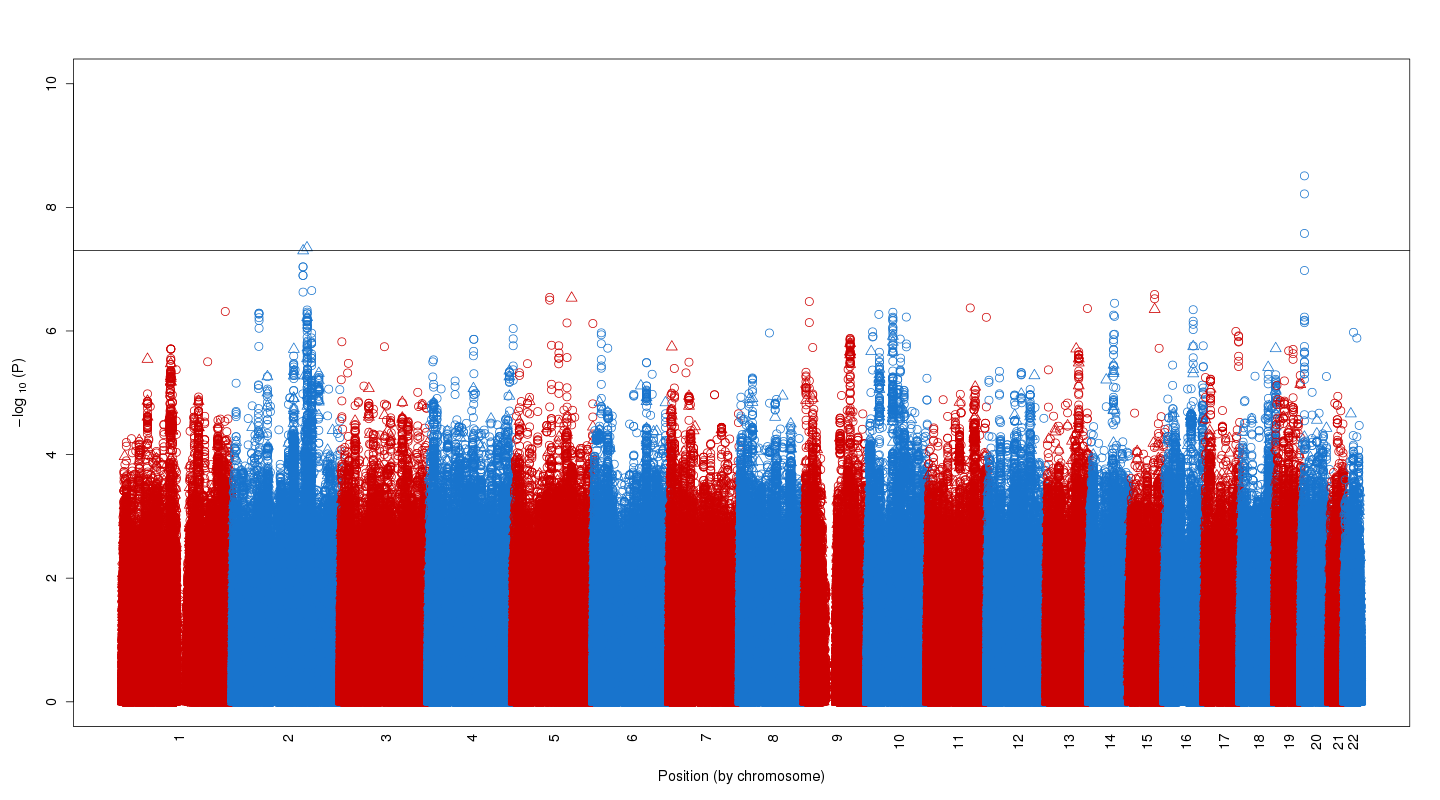

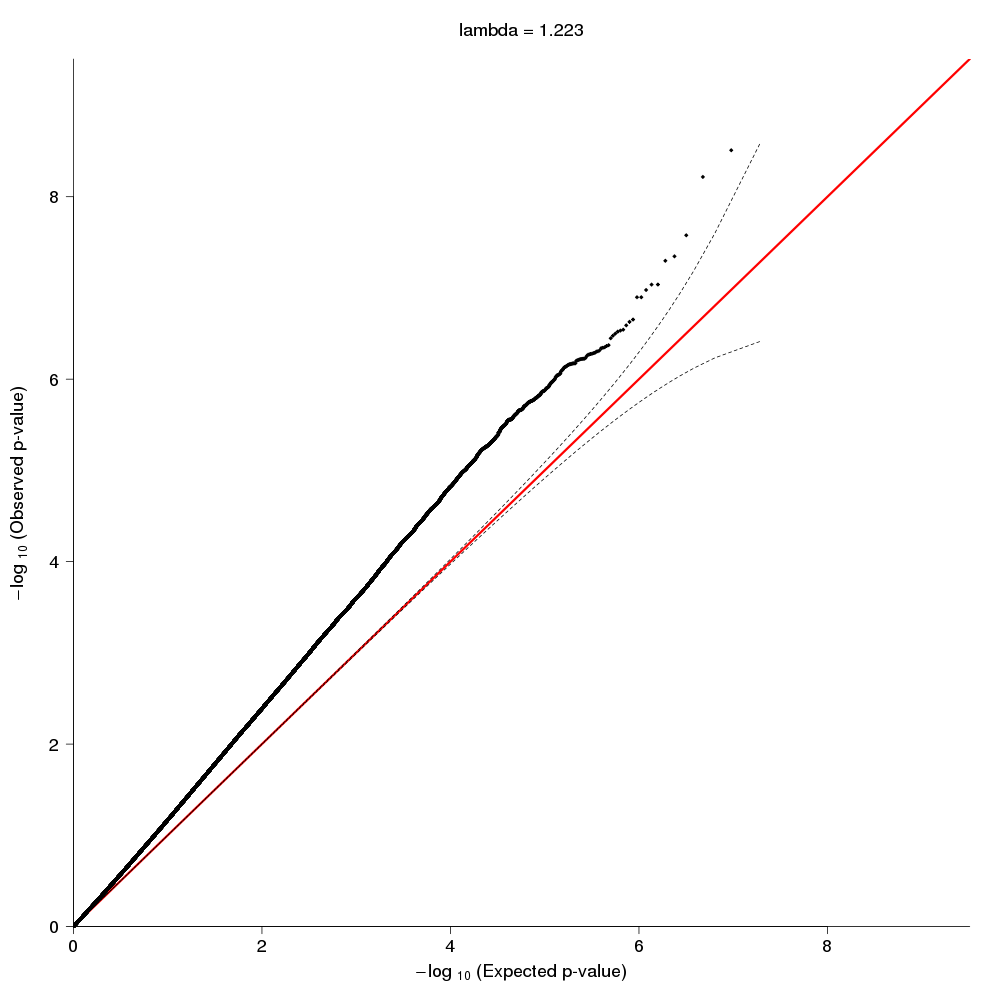

In [3]:
library("IRdisplay")
display_png(file="C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/results/ea/kreek.ea.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.plot.all_chr.snps+indels.manhattan.png")  
display_png(file="C:/Users/jmarks/Desktop/Projects/Heroin/ngc/kreek/results/ea/kreek.ea.1000G.oaall.maf_gt_0.01.rsq_gt_0.3.assoc.plot.all_chr.snps+indels.qq.png")  

Because the lambda value is inflate - indicated possible underlying population structure - we will perform genomic control on the EA group using the METAL software. Specifically, we will perform a meta-analysis using METAL with the Kreek EAs as the only cohort and apply genomic control.

## Apply Genomic Control to EAs
First I need to prepend the `MARKERNAME` column to the GWAS results

In [ ]:

# take off headers except for header row with column identifiers
# adding a dummy column for now which will be converted to 1000Gp3
# with the convert_to_1000g_ids perl script
for chr in {1..22};do
    myDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/processing/chr$chr
    zcat $myDir/*gz | tail -n +31 > $myDir/kreek.tmp
    awk '{ print "MARKERNAME",$0 }' $myDir/kreek.tmp > $myDir/kreek.ea.1000G_p3.gwas.results
done

# convert to 1000g
for chr in {1..22};do
    myDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/processing/chr$chr

    perl /shared/bioinformatics/software/perl/id_conversion/convert_to_1000g_p3_ids.pl \
        --file_in $myDir/kreek.ea.1000G_p3.gwas.results\
        --file_out $myDir/tmp\
        --legend /shared/data/ref_panels/1000G/2014.10/1000GP_Phase3_chr$chr.legend.gz\
        --file_in_id_col 0\
        --file_in_chr_col 1\
        --file_in_pos_col 2\
        --file_in_a1_col 3\
        --file_in_a2_col 4\
        --chr $chr
    awk ' { if (NR==1) {$1 = "MARKERNAME"}} {print $0}' $myDir/tmp > $myDir/kreek.ea.1000G_p3.gwas.results
    rm $myDir/tmp $myDir/kreek.ea.1000G_p3.gwas.results $myDir/kreek.tmp
done &

# add a SE column
for chr in {1..22};do
    myDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/processing/chr$chr
    awk '{ print $0,"SE" }' $myDir/kreek.ea.1000G_p3.gwas.results >\
        $myDir/tmp && mv $myDir/tmp $myDir/kreek.ea.1000G_p3.gwas.results
done &

for chr in {1..22};do
    cp chr$chr/kreek.ea.1000G_p3.se.gwas.results chr$chr/kreek.ea.1000G_p3.gwas.results
    awk '{$18="";print $0}' chr$chr/kreek.ea.1000G_p3.gwas.results >\
        chr$chr/tmp && mv chr$chr/tmp chr$chr/kreek.ea.1000G_p3.gwas.results
done &


# processing the se files, note that if there are NAs in the
# SQRT_V_STAT column just set the SE to NA
for chr in {1..22};do
    awk ' NR>=2\
            { if ( $15=="NA" ) \
                 $18="NA";\
              else\
                 $18=1/$15;\
            }\
        {print $0}' chr$chr/kreek.ea.1000G_p3.se.gwas.results >\
                    chr$chr/tmp && mv chr$chr/tmp chr$chr/kreek.ea.1000G_p3.se.gwas.results
done

# clean up directory
for chr in {1..22};do
    #mv chr$chr/kreek.ea.1000G_p3.se.gwas.results chr$chr/kreek.ea.1000G_p3.chr$chr.se.gwas.results
    #rm chr$chr/kreek.ea.1000G_p3.se.gwas.results
    rm chr$chr/kreek.ea.1000G.gwas.results
done

**Note** I had to update the `qsub_metal` script to recognize the updated paths when switching from the MIDAS computing platform to AWS. The parallel computing environment was update from ORTE to XXXX as well.

In [ ]:
myDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea
mkdir -p $myDir/genomic_control/{processing,final,test}
myCohorts=kreek_ea.eur

#for (( chr=1; chr<23; chr++)); do
chr=22
  /shared/bioinformatics/software/scripts/qsub_metal_v02.sh \
    --SCHEME STDERR \
    --MARKER MARKERNAME \
    --ALLELE A1 A2 \
    --EFFECT ALT_EFFSIZE \
    --PVALUE PVALUE \
    --STDERR SE \
    --GENOMICCONTROL ON \
        --PROCESS $myDir/processing/chr$chr.test/kreek.ea.1000G_p3.chr$chr.se.gwas.results \
        --OUTFILE $myDir/genomic_control/test2/$myCohorts.chr$chr.1df .metal \
    --ANALYZE HETEROGENEITY \
    --script_prefix $myDir/genomic_control/test2/$myCohorts.chr$chr.1df \
    --mem 3.8 \
    --nslots 1 \
    --priority 0
done


myDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea
myCohorts=kreek_ea.eur

### START Merge ProbABEL and METAL results ###
#for (( chr=1; chr<23; chr++ )); do
#chr=22
#  /shared/bioinformatics/software/scripts/qsub_job.sh \
#    --job_name meta_${chr} \
#    --script_prefix $myDir/processing/$myCohorts.chr$chr.1df \
#    --mem 15 \
#    --priority 0 \
#    --program Rscript /shared/bioinformatics/software/R/merge_probabel_metal.R \
#        --metal $myDir/genomic_control/processing/$myCohorts.chr$chr.1df.metal \
#        --probabel $myDir/processing/chr$chr/kreek.ea.1000G_p3.chr$chr.se.gwas.results \
#        --chr_columns 2 \
#        --pos_columns 3 \
#        --probabel_merge_bys SE \
#        --probabel_labels KREEK_EA \
#        --out $myDir/genomic_control/final/$myCohorts.chr$chr.probabel.merged.metal.results.1df
#done


# note that I probably should use one of the python merge scripts that is still on MIDAS. 
# They seem to do what I want.


myDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea
myCohorts=kreek_ea.eur

chr=22
  /shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name meta_${chr} \
    --script_prefix $myDir/processing/$myCohorts.chr$chr.1df \
    --mem 15 \
    --priority 0 \
    --program python ~/*py \
        --metal $myDir/genomic_control/processing/$myCohorts.chr$chr.1df.metal \
        --probabel $myDir/processing/chr$chr/kreek.ea.1000G_p3.chr$chr.se.gwas.results \
        --probabel_labels KREEK_EA \
        --out $myDir/genomic_control/final/$myCohorts.chr$chr.probabel.merged.metal.results.1df
done

# Potential issues with METAL (resolved)


`The potential issue with METAL is explained below.` We have since solved the conundrum. In short, METAL handles the flipping of the alleles different from what I one would expect after reading their [alternative instruction file](http://csg.sph.umich.edu/abecasis/METAL/metal-instructions.pdf). The explanation for how METAL actually handles the flipping of the alleles is explained [in this GitHub Issue](https://github.com/Nealelab/ricopili/issues/55). 


From what I can tell, the `Allele1` and `Allele2` outputs from METAL are sometimes opposite of what it should be. Adhoc example, `InputA1 = A` & `InputA2 = C` but `OutputA1 = C` & `OutputA2 = A`. When flipping of the alleles occurs, the beta is flipped (from positive to negative || vice versa). When the output `Allele1` and `Allele2` are in concordance with the input alleles then the output beta is in the correct direction - i.e. the same direction as the input beta. 

* Why does this happen?

## with --ALLELE REF ALT

** head /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/genomic_control/processing/kreek_ea.eur.chr22.1df.metal**
```
MarkerName      Allele1 Allele2 Effect  StdErr  P-value Direction       HetISq  HetChiSq        HetDf   HetPVal
rs368712549:25955830:C:T        t       c       -62.3493        43.3745 0.1506  -       0.0     0.000   0       1
rs77984742:33786382:C:T t       c       -1.6464 4.3573  0.7055  -       0.0     0.000   0       1
22:44524532:C:A a       c       201.5220        123.2992        0.1022  +       0.0     0.000   0       1
rs146476801:31083131:C:T        t       c       -1.0409 10.8151 0.9233  -       0.0     0.000   0       1
22:26205770:T:C t       c       -155.0640       134.5980        0.2493  -       0.0     0.000   0       1
rs12160960:28067205:T:C t       c       0.0034  0.0822  0.9671  +       0.0     0.000   0       1
```

<bl>
**grep rs368712549:25955830:C:T ../../processing/chr22/kreek.ea.1000G_p3.chr22.se.gwas.results**
```
MARKERNAME CHROM POS REF ALT N_INFORMATIVE AF INFORMATIVE_ALT_AC CALL_RATE HWE_PVALUE N_REF N_HET N_ALT U_STAT SQRT_V_STAT ALT_EFFSIZE PVALUE SE
    
rs368712549:25955830:C:T 22 25955830 C T 624 0.00011859 0.148 1 1 624 0 0 0.0376685 0.0245795 62.3493 0.125395 40.6843
    
rs77984742:33786382:C:T 22 33786382 C T 624 0.000988782 1.234 1 1 624 0 0 0.0985617 0.244675 1.64637 0.687076 4.08705
    
22:44524532:C:A 22 44524532 C A 624 3.6859e-05 0.046 1 1 624 0 0 -0.0150666 0.00864663 -201.522 0.0814233 115.652
    
rs146476801:31083131:C:T 22 31083131 C T 624 0.000698718 0.872 1 1 624 0 0 0.0101148 0.098578 1.04088 0.918274 10.1443
22:26205770:T:C 22 26205770 T C 624 4.64744e-05 0.058 1 1 624 0 0 -0.0097286 0.00792081 -155.064 0.21936 126.25
rs12160960:28067205:T:C 22 28067205 T C 624 0.169362 211.364 1 0.314938 436 167 21 0.570633 12.9654 0.00339456 0.964895 0.0771284
```

## with --ALLELE ALT REF
** head /shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/genomic_control/test/kreek_ea.eur.chr22.1df.metal**

```
MarkerName      Allele1 Allele2 Effect  StdErr  P-value Direction       HetISq  HetChiSq        HetDf   HetPVal
rs368712549:25955830:C:T        t       c       62.3493 43.3745 0.1506  +       0.0     0.000   0       1
rs77984742:33786382:C:T t       c       1.6464  4.3573  0.7055  +       0.0     0.000   0       1
22:44524532:C:A a       c       -201.5220       123.2992        0.1022  -       0.0     0.000   0       1
rs146476801:31083131:C:T        t       c       1.0409  10.8151 0.9233  +       0.0     0.000   0       1
rs12160960:28067205:T:C t       c       -0.0034 0.0822  0.9671  -       0.0     0.000   0       1
```


<bl>
**grep rs368712549:25955830:C:T ../../processing/chr22/kreek.ea.1000G_p3.chr22.se.gwas.results**
```
MARKERNAME CHROM POS REF ALT N_INFORMATIVE AF INFORMATIVE_ALT_AC CALL_RATE HWE_PVALUE N_REF N_HET N_ALT U_STAT SQRT_V_STAT ALT_EFFSIZE PVALUE SE
    
rs368712549:25955830:C:T 22 25955830 C T 624 0.00011859 0.148 1 1 624 0 0 0.0376685 0.0245795 62.3493 0.125395 40.6843
    
rs77984742:33786382:C:T 22 33786382 C T 624 0.000988782 1.234 1 1 624 0 0 0.0985617 0.244675 1.64637 0.687076 4.08705
    
22:44524532:C:A 22 44524532 C A 624 3.6859e-05 0.046 1 1 624 0 0 -0.0150666 0.00864663 -201.522 0.0814233 115.652
    
rs146476801:31083131:C:T 22 31083131 C T 624 0.000698718 0.872 1 1 624 0 0 0.0101148 0.098578 1.04088 0.918274 10.1443
rs12160960:28067205:T:C 22 28067205 T C 624 0.169362 211.364 1 0.314938 436 167 21 0.570633 12.9654 0.00339456 0.964895 0.0771284
```

### sandbox

In [ ]:
BASE_DIR = '/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/genomic_control/test2/'
inF = open(BASE_DIR + 'kreek_ea.eur.chr22.1df.metal')

inF.readline() 
line = inF.readline()
concordance = 0
discordance = 0
while(line):
    actual_allele1 = line.split()[0].split(":")[2]
    supposed_allele1 = line.split()[1].capitalize()
    if actual_allele1 == supposed_allele1:
        concordance += 1
    else:
        discordance += 1
    line = inF.readline()
print("concordance count of %s", concordance)
print("discordance count of %s", discordance)

# Upload results to S3

In [ ]:
aaFinalDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/aa/final
aaResultsDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/aa/processing

eaFinalDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/final
eaResultsDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/association_tests/001/ea/processing

# gzip all results files
for chr in {1..22};do
    gzip $eaFinalDir/* $aaFinalDir/*
    gzip $aaResultsDir/chr$chr/* $eaResultsDir/chr$chr/*
done &

# upload GWAS results aa & ea
aws s3 sync $aaFinalDir s3://rti-heroin/kreek/results/aa/  --quiet &
aws s3 sync $eaFinalDir s3://rti-heroin/kreek/results/ea/ --quiet &
aws s3 sync $eaResultsDir s3://rti-heroin/kreek/results/ea/ --quiet &
aws s3 sync $aaResultsDir s3://rti-heroin/kreek/results/aa/ --quiet &

# upload GC applied GWAS results ea
aws s3 sync $eaFinalDir/../genomic_control/processing s3://rti-heroin/kreek/results/ea/genomic_control --quiet &

# upload phenotype data
phenoDir=/shared/bioinformatics/jmarks/heroin/kreek/gwas/oaall/data/phenotype
aws s3 cp $phenoDir/phs001109.v1.pht005447.v1.p1.c1.Addictive_Diseases_Subject_Phenotypes.DS-ADX-IRB-NPU.txt s3://rti-heroin/kreek/data/phenotype/phs001109.v1.pht005447.v1.p1.c1.Addictive_Diseases_Subject_Phenotypes.DS-ADX-IRB-NPU.txt
aws s3 cp $phenoDir/phs001109.v1.pht005445.v1.p1.Addictive_Diseases_Subject.MULTI.txt s3://rti-heroin/kreek/data/phenotype/phs001109.v1.pht005445.v1.p1.Addictive_Diseases_Subject.MULTI.txt
aws s3 sync $phenoDir/final s3://rti-heroin/kreek/data/phenotype/final/
